In [1]:
%load_ext rpy2.ipython

In [148]:
from IPython.display import FileLink

In [139]:
%%R
library(dplyr); library(tidyr)
library(phyloseq)
library(ggplot2)
library(vegan)
library(FField)

In [20]:
!head -n1 ../data/HB_Noxide.csv

In [42]:
%%R
sd = read.csv("../data/HB_Noxide.csv", stringsAsFactors = FALSE) %>%
    select(Sample.Name, Treatment, Elevation, Depth)

rownames(sd) = sd$Sample.Name

sd = sample_data(sd)

In [99]:
%%R
counts = read.csv("../data/HB_Noxide.csv", stringsAsFactors = FALSE) %>%
    select(Nap, Nar, NirK, NirS, cNor, qNor, Nos, Sample.Name, Sequence.Read.Depth) %>%
    gather(key, value, -Sample.Name, -Sequence.Read.Depth) %>%
    mutate(count = value / Sequence.Read.Depth * 1000000) %>%
    select(Sample.Name, key, count) %>%
    spread(key, count)

rownames(counts) = counts$Sample.Name

counts$Sample.Name = NULL

counts = otu_table(counts, taxa_are_rows = FALSE)

In [100]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 4 sample variables ]


Wisconsin double standardization
Run 0 stress 0.1183359 
Run 1 stress 0.1710055 
Run 2 stress 0.1781071 
Run 3 stress 0.118336 
... procrustes: rmse 0.0001652978  max resid 0.0005388139 
*** Solution reached


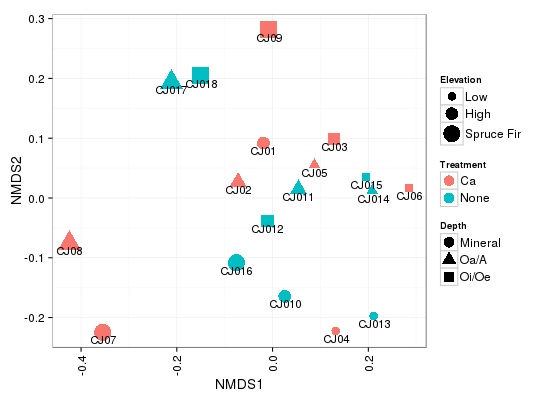

In [154]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Elevation = factor(ord.plot$Elevation, levels = c("Low", "High", "Spruce Fir"))

ord.plot.nmds = ord.plot

x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

p = ggplot(ord.plot.nmds, aes(x = NMDS1, y = NMDS2, color = Treatment, shape = Depth, size = Elevation))

p = p + geom_point()

p = p + scale_size_discrete(range = c(4,8))

p = p + geom_text(color = "black", aes(x = text.x, 
                                       y = text.y,
                                       label = Sample.Name), size = 4, vjust = 1.5, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))

ggsave("../figs/ordination.nmds.pdf", h = 5.5, w = 7.75)            

p

In [150]:
FileLink("../figs/ordination.nmds.pdf")

/home/armanda/N-project/figs/ordination.nmds.pdf

In [141]:
%%R
x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

ord.plot.nmds

             NMDS1       NMDS2 Sample.Name Treatment  Elevation   Depth
CJ01  -0.019232933  0.09191827        CJ01        Ca       High Mineral
CJ010  0.025481080 -0.16459354       CJ010      None       High Mineral
CJ011  0.054000312  0.01468284       CJ011      None       High    Oa/A
CJ012 -0.011230813 -0.03846371       CJ012      None       High   Oi/Oe
CJ013  0.211084581 -0.19759188       CJ013      None        Low Mineral
CJ014  0.207891408  0.01265526       CJ014      None        Low    Oa/A
CJ015  0.195424853  0.03470939       CJ015      None        Low   Oi/Oe
CJ016 -0.075466777 -0.10813294       CJ016      None Spruce Fir Mineral
CJ017 -0.211201973  0.19348217       CJ017      None Spruce Fir    Oa/A
CJ018 -0.150042392  0.20464889       CJ018      None Spruce Fir   Oi/Oe
CJ02  -0.071964671  0.02695148        CJ02        Ca       High    Oa/A
CJ03   0.128205322  0.09853476        CJ03        Ca       High   Oi/Oe
CJ04   0.131854124 -0.22232830        CJ04        Ca        Low 

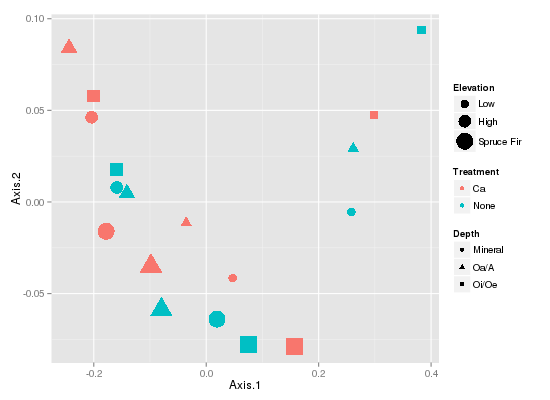

In [103]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "PCoA", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Elevation = factor(ord.plot$Elevation, levels = c("Low", "High", "Spruce Fir"))

ord.plot.mds = ord.plot

p = ggplot(ord.plot, aes(x = Axis.1, y = Axis.2, color = Treatment, shape = Depth, size = Elevation))

p = p + geom_point()

p = p + scale_size_discrete(range = c(4,8))

p

In [105]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Elevation = factor(data$Elevation, levels = c("Low", "High", "Spruce Fir"))

adonis(bray.dist ~ Elevation, data)


Call:
adonis(formula = bray.dist ~ Elevation, data = data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Elevation  2   0.48983 0.244914  13.165 0.63707  0.001 ***
Residuals 15   0.27905 0.018604         0.36293           
Total     17   0.76888                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
